In [2]:
## Notebook to demonstrate and visualise data and IIR filtering. ##
# %% raw
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Load dataset
weather_data = pd.read_csv('london_weather.csv')
weather_data = weather_data[['date', 'mean_temp', 'sunshine','global_radiation','max_temp','min_temp']]
weather_data = weather_data.set_index('date', drop = True)
weather_data.index = pd.to_datetime(weather_data.index,format="%Y%m%d")
# Interpolate NaNs
weather_data = weather_data.interpolate(method='time')

# Convert to values
values = weather_data.values

In [3]:
training_data_len = math.ceil(len(values) * 0.8)
np.random.seed(80)

In [4]:
# Apply 4th order low pass butterworth at a period of 1/0.03 days
b, a = signal.iirfilter(4, 0.03, btype="low", ftype="butter")
print(b, a, sep="\n")
values_filt = [None] * 5
for i in range(5):
    values_filt[i] = signal.filtfilt(b, a , values[:,i])
values_filt = np.array(values_filt).transpose()

[4.37268880e-06 1.74907552e-05 2.62361328e-05 1.74907552e-05
 4.37268880e-06]
[ 1.         -3.75376276  5.29115258 -3.3189386   0.78161874]


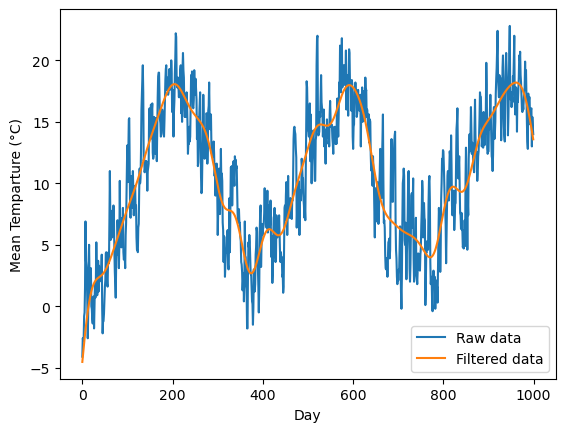

In [12]:
# Plot relevant figures
plt.figure()
plt.plot(values[0:1000, 0], label="Raw")
plt.plot(values_filt[0:1000, 0], label="IIR filtered")
plt.ylabel("Mean Temparture (\N{DEGREE SIGN}C)")
plt.xlabel("Day")
plt.legend(['Raw data', 'Filtered data'], loc='lower right')
plt.show()

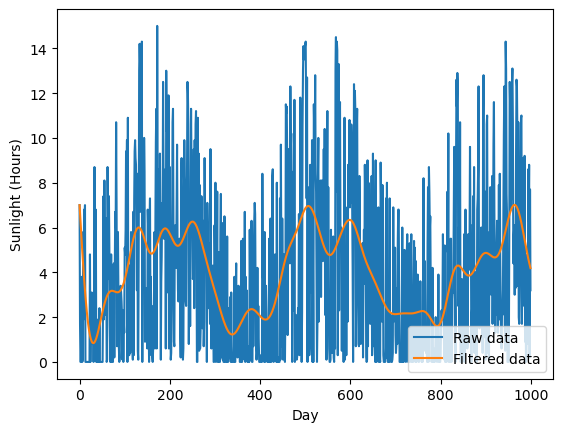

In [6]:
plt.figure()
plt.plot(values[0:1000, 1], label="Raw")
plt.plot(values_filt[0:1000, 1], label="IIR filtered")
plt.ylabel("Sunlight (Hours)")
plt.xlabel("Day")
plt.legend(['Raw data', 'Filtered data'], loc='lower right')
plt.show()

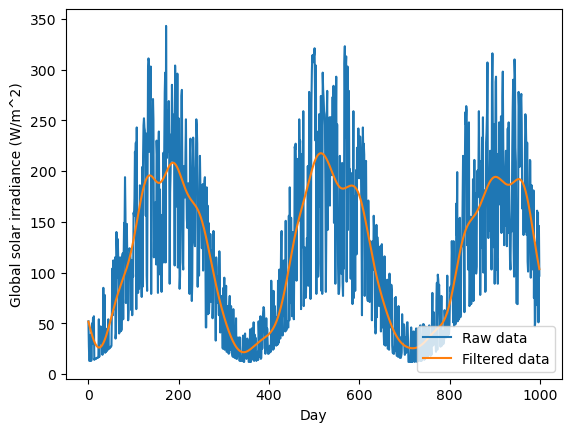

In [7]:
plt.figure()
plt.plot(values[0:1000, 2], label="Raw")
plt.plot(values_filt[0:1000, 2], label="IIR filtered")
plt.ylabel("Global solar irradiance (W/m^2)")
plt.xlabel("Day")
plt.legend(['Raw data', 'Filtered data'], loc='lower right')
plt.show()

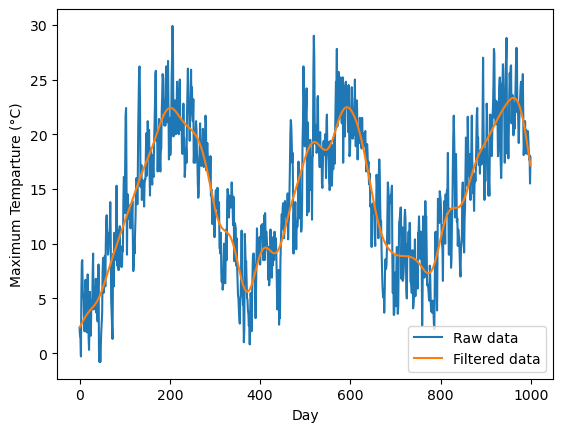

In [8]:
plt.figure()
plt.plot(values[0:1000, 3], label="Raw")
plt.plot(values_filt[0:1000, 3], label="IIR filtered")
plt.ylabel("Maximum Temparture (\N{DEGREE SIGN}C)")
plt.xlabel("Day")
plt.legend(['Raw data', 'Filtered data'], loc='lower right')
plt.show()

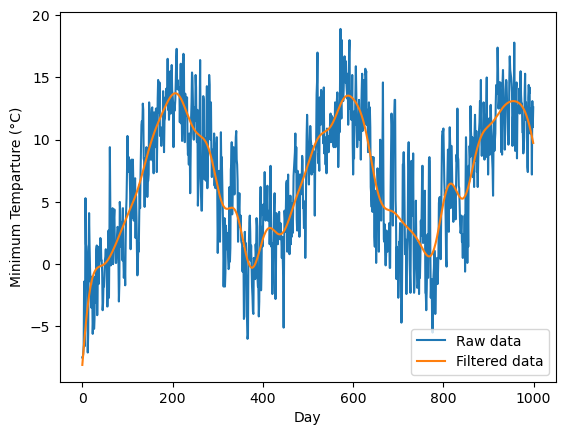

In [9]:
plt.figure()
plt.plot(values[0:1000, 4], label="Raw")
plt.plot(values_filt[0:1000, 4], label="IIR filtered")
plt.ylabel("Minimum Temparture (\N{DEGREE SIGN}C)")
plt.xlabel("Day")
plt.legend(['Raw data', 'Filtered data'], loc='lower right')
plt.show()